# E-tivity 2 Weeks 3-4

* Your Name

* Your Student ID

## Outline


The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to the Group Locker. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Brightspace.

Marks will be deducted if task 5 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the rubrics for the e-tivity are here https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=73310&rubricId=4446&originTool=quicklinks





<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to the Group Locker. No posts should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values.


### Task 5:  (completed by Sunday Week 4)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://www.tensorflow.org/api_docs/python/tf/keras/layers) that you allowed to use are:
- Input,
- Embedding,
- Dense,
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout.

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


(25000, 500)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 500, 16)        │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 500, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10)             │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691 (10.51 KB)

 Trainable params: 2,691 (10.51 KB)

 Non-trainable params: 0 (0.00 B)

None

--- Final Evaluation (Baseline) ---
RNN Baseline Test Loss: 0.4824
RNN Baseline Test Accuracy: 77.23%


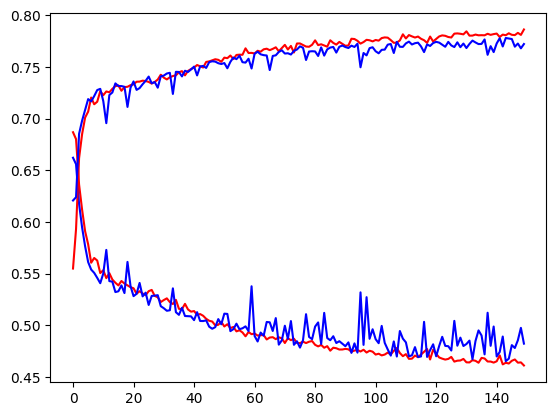

In [30]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)
print(X_train.shape)

embedding_vector_length = 16
model_imdb = Sequential()
model_imdb.add(Input(shape=(max_review_length,)))
model_imdb.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_imdb.add(Dropout(0.2))
model_imdb.add(LSTM(10))
model_imdb.add(Dropout(0.2))
model_imdb.add(Dense(1, activation='sigmoid'))
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_imdb.summary())
#plot_model(model_imdb,show_shapes=True)

nepoch = 150
#IMDB_history = model_imdb.fit(X_train,Sc_train,validation_data=(X_test,Sc_test),epochs=nepoch,batch_size=256)
IMDB_history=np.load('IMDBTrainhist.npy',allow_pickle='TRUE').item()

plt.plot(range(nepoch),IMDB_history.history['loss'],c='r')
plt.plot(range(nepoch),IMDB_history.history['val_loss'],c='b')
plt.plot()

plt.plot(range(nepoch),IMDB_history.history['accuracy'],c='r')
plt.plot(range(nepoch),IMDB_history.history['val_accuracy'],c='b')
plt.plot()

# --- Final Quantitative Result ---
# Pull the last value from the validation history to show the 'Test' result
final_rnn_loss = IMDB_history.history['val_loss'][-1]
final_rnn_acc = IMDB_history.history['val_accuracy'][-1]

print("\n--- Final Evaluation (Baseline) ---")
print(f"RNN Baseline Test Loss: {final_rnn_loss:.4f}")
print(f"RNN Baseline Test Accuracy: {final_rnn_acc*100:.2f}%")



The history for the model above has been saved, as it takes a while to run. If you want to run it yourself then comment out the second line.


### Final Submission (complete by Sunday Week 4)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.


In [17]:
## Add additional code cells to implememt the tasks stated above

--- Attention Model Architecture ---


Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 500, 16)   │      1,600 │ input_layer_10[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling1d_1 │ (None, 250, 16)   │          0 │ embedding_10[0][… │
│ (AveragePooling1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 250, 16)   │          0 │ average_pooling1… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_5         │ (None, 250, 16)   │          0 │ dropout_20[0][0], │
│ (Attention)         │                   │            │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 16)        │          0 │ attention_5[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 16)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         17 │ dropout_21[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,617 (6.32 KB)

 Trainable params: 1,617 (6.32 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Phase ---
Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 496ms/step - accuracy: 0.5078 - loss: 0.6925 - val_accuracy: 0.5423 - val_loss: 0.6894
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 513ms/step - accuracy: 0.5667 - loss: 0.6876 - val_accuracy: 0.5768 - val_loss: 0.6770
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 482ms/step - accuracy: 0.6335 - loss: 0.6652 - val_accuracy: 0.6719 - val_loss: 0.6317
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 497ms/step - accuracy: 0.6639 - loss: 0.6250 - val_accuracy: 0.6810 - val_loss: 0.6068
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 495ms/step - accuracy: 0.6851 - loss: 0.6039 - val_accuracy: 0.6643 - val_loss: 0.6041
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 484ms/step - accuracy: 0.6836 - loss: 0.5984 - val_accuracy: 0.7011 - val_loss: 0.5884
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 488ms/step - accuracy: 0.6930 - loss: 0.5905 - val_accuracy: 0.6755 - val_loss: 0.5940
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 494ms/step - accuracy: 0.6930 -

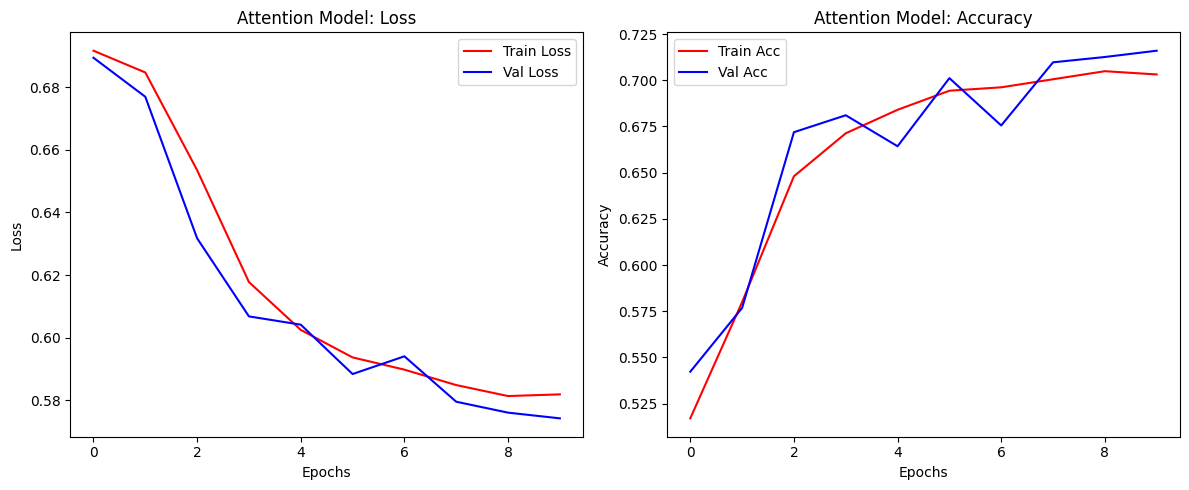


Final Attention Model Test Accuracy: 71.60%


In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Attention, GlobalAveragePooling1D, AveragePooling1D
import matplotlib.pyplot as plt

# 1. Maintain the required hyperparameters
top_words = 100
max_review_length = 500
embedding_vector_length = 16
nepoch_attention = 10 # Set to 10 for a good balance of speed and visual results

# 2. Construct the Attention-Only Model (Strictly using permitted layers)
inputs = Input(shape=(max_review_length,))
x = Embedding(input_dim=top_words, output_dim=embedding_vector_length)(inputs)

# 'Sensible' step: Downsample for speed without losing the 100-word signal
x = AveragePooling1D(pool_size=2)(x)
x = Dropout(0.2)(x)

# Self-Attention mechanism
attention_output = Attention()([x, x])

# Pool and predict
x = GlobalAveragePooling1D()(attention_output)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

# 3. Initialise and Compile
attention_model = Model(inputs=inputs, outputs=outputs)
attention_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# --- Output 1: Model Summary ---
print("--- Attention Model Architecture ---")
attention_model.summary()

# --- Output 2: Training Phase ---
print("\n--- Training Phase ---")
history_attention = attention_model.fit(
    X_train, Sc_train,
    validation_data=(X_test, Sc_test),
    epochs=nepoch_attention,
    batch_size=256
)

# --- Output 3: Visualisation (Matching your RNN style) ---
# Create a figure with two subplots for a cleaner dashboard look
plt.figure(figsize=(12, 5))

# Plot 1: Loss Curves
plt.subplot(1, 2, 1)
plt.plot(range(nepoch_attention), history_attention.history['loss'], c='r', label='Train Loss')
plt.plot(range(nepoch_attention), history_attention.history['val_loss'], c='b', label='Val Loss')
plt.title('Attention Model: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot 2: Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(range(nepoch_attention), history_attention.history['accuracy'], c='r', label='Train Acc')
plt.plot(range(nepoch_attention), history_attention.history['val_accuracy'], c='b', label='Val Acc')
plt.title('Attention Model: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# --- Output 4: Final Quantitative Result ---
test_loss, test_acc = attention_model.evaluate(X_test, Sc_test, verbose=0)
print(f"\nFinal Attention Model Test Accuracy: {test_acc*100:.2f}%")

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.